# How to define a system in ThreeBodyProblem.jl
This notebook defines two bodies and uses them to create a three-body system. It goes over useful functions and constants and shows how to use the plot recipes.

### The first step is to import the ThreeBodyProblem Package

In [1]:
@time using ThreeBodyProblem

 10.267580 seconds (13.14 M allocations: 858.779 MiB, 2.58% gc time, 2.65% compilation time)


## Defining New Bodies

### We use the Body() constructor to create a new planet and a new moon

In [2]:
# Create the ice planet Hoth
m = 1e24 # {kg} mass
R = 1e6 # {km} mean radius
a = 1.5*AU # {km} mean semimajor axis
T = 0.6*JY # {sec} mean orbital period
name = "Hoth"
color = :blue
newplanet = Body(m, R, a, T, name, color)

Body(1.0e24, 1.0e6, 2.2439680604999998e8, 1.893456e7, "Hoth", :blue)

In [3]:
# Create the forest moon Endor
m = 1e22 # {kg} mass
R = 1e6 # {km} mean radiusasdf
a = 0.2*AU # {km} mean semimajor axis
T = 2π*sqrt(a^3/(G*newplanet.m)) # {sec} mean orbital period
name = "Endor"
color = :green
newmoon = Body(m, R, a, T, name, color)

Body(1.0e22, 1.0e6, 2.991957414e7, 3.9802478652529187e9, "Endor", :green)

### Note that we can use the constants AU, JY, JD, and G to define our bodies

In [4]:
println("AU = ",AU) # km in an astronomical unit
println("JY = ",JY) # seconds in a Julian Year
println("JD = ",JD) # seconds in a Julian day
println("G = ",G)  # universal gravitational constant

AU = 1.495978707e8


JY = 3.15576e7
JD = 86400
G = 6.6743e-20


## Defining a New System

### We use the System() constructor with newplanet and newmoon as our primary and secondary bodies.

In [5]:
sys = System(newplanet, newmoon)

System(Body(1.0e24, 1.0e6, 2.2439680604999998e8, 1.893456e7, "Hoth", :blue), Body(1.0e22, 1.0e6, 2.991957414e7, 3.9802478652529187e9, "Endor", :green), 2.991957414e7, 3.9802478652529187e9, 66743.0, 667.43, 0.009900990099009901, 1.0e6, 1.0e6, 66743.0, 667.43, 0.009900990099009901, 1.0e6, 1.0e6, 1.01e24, 2.991957414e7, 6.334761224859662e8, 0.047230784362614756, 7.455811306236106e-11, "Hoth/Endor")

### We can access system parameters with the dot operator, including the body structs in the system

In [6]:
println("System period is ",sys.T, " seconds")
println("The Primary Body is ", sys.prim.name)

System period is 3.9802478652529187e9 seconds
The Primary Body is Hoth


### In the CR3BP, the dynamics of a system are completely defined by its mass parameter, μ.

In [7]:
sys.μ

0.009900990099009901

### While it looks pretty to use greek letters μ and other unicode operators like superscripts r¹ and subscripts r₁, they may cause trouble with plotting and in other situations. So there are always non-unicode alternatives, like sys.mu instead of sys.μ

In [8]:
sys.mu

0.009900990099009901

## Plotting a System

### We can plot a System object using the plot() command

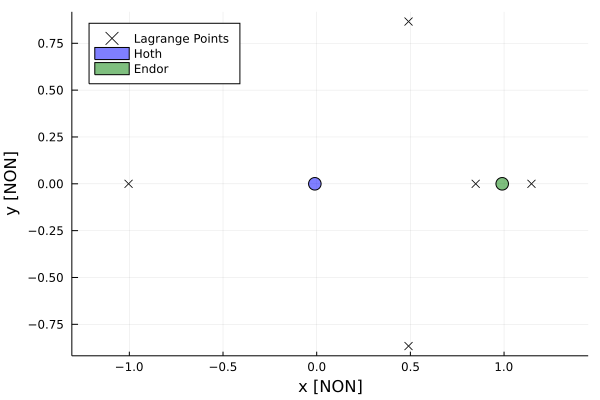

In [9]:
using Plots
plot(sys)

Notice that the plot is made in the rotating frame, with non-dimensionalized coordinates

###  We can also plot individual bodies

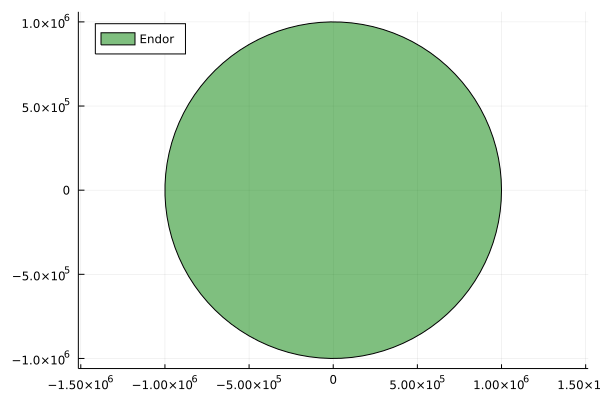

In [10]:
plot(newmoon)

Note that bodies plotted alone will be centered at the origin and be plotted in dimensional coordinates

### We can plot just the bodies in the CR3BP by setting Lpts to false, or vice versa

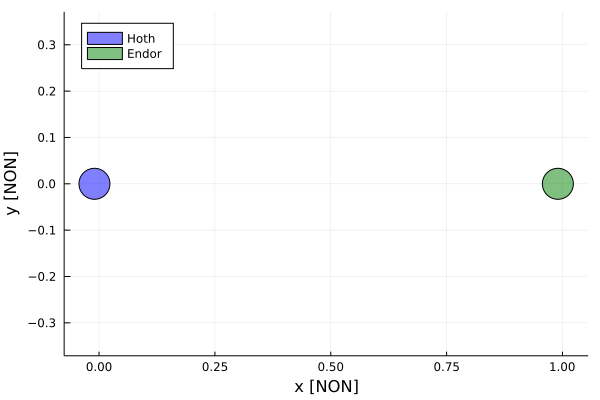

In [11]:
plot(sys, Lpts=false)

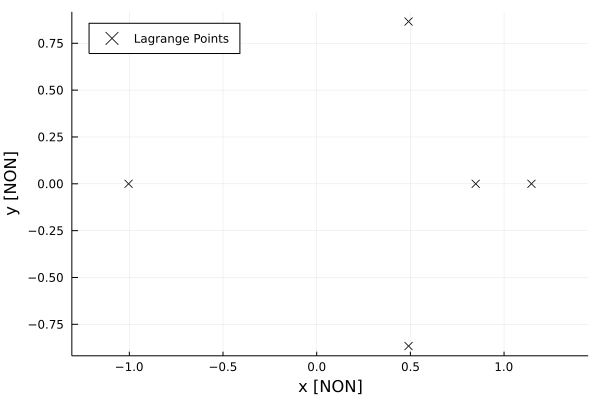

In [12]:
plot(sys, prim=false, sec=false)

### There are pre-programmed variables and functions for many common systems.

In [13]:
println("EARTH = ",EARTH)
println("SUN = ",SUN)
println("MOON = ",MOON)
println("JUPITER = ",JUPITER)
println("EUROPA = ",EUROPA)
println("STYX = ",STYX)
sys = System(SUN,MERCURY)

EARTH = Body

(5.97237e24, 6371.0084, 1.495978976276167e8, 3.155814910224e7, "Earth", :

blue)
SUN = Body(1.98847e30, 695700.0, 0.0, 0.0, "Sun", :yellow)
MOON = Body(7.3457905697975825e22, 1737.5, 384400.0, 2.3606208e6, "Moon", :grey)
JUPITER = Body(1.898187e27, 69911.0, 7.782799587829314e8, 3.74355659124e8, "Jupiter", :red)
EUROPA = Body(4.798615308144276e22, 1560.8, 671100.0, 306806.4, "Europa", :grey)
STYX = Body(0.29965689285767794, 10.0, 57729.0, 1.741824e6, "Styx", :grey)


System(Body(1.98847e30, 695700.0, 0.0, 0.0, "Sun", :yellow), Body(3.30114e23, 2439.4, 5.790910087931299e7, 7.60054381992e6, "Mercury", :grey), 5.790910087931299e7, 7.60054381992e6, 1.3271645321e11, 22032.798702, 1.660140435593396e-7, 695700.0, 2439.4, 1.3271645321e11, 22032.798702, 1.660140435593396e-7, 695700.0, 2439.4, 1.988470330114e30, 5.790910087931299e7, 1.2096641191268244e6, 47.872049739818436, 3.9574662902603135e-5, "Sun/Mercury")

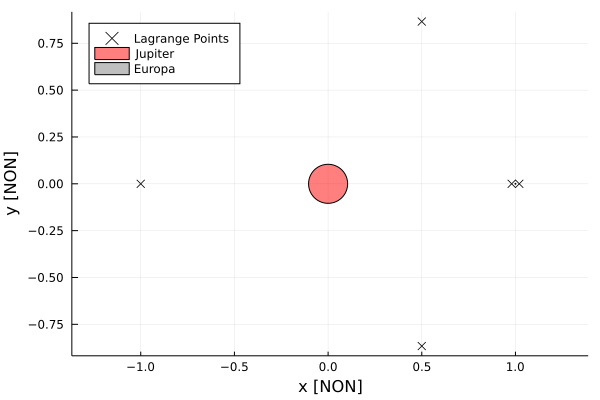

In [14]:
plot(jupiter_europa())

When you plot these real systems, it's interesting to see the relative size between the primary and secondary

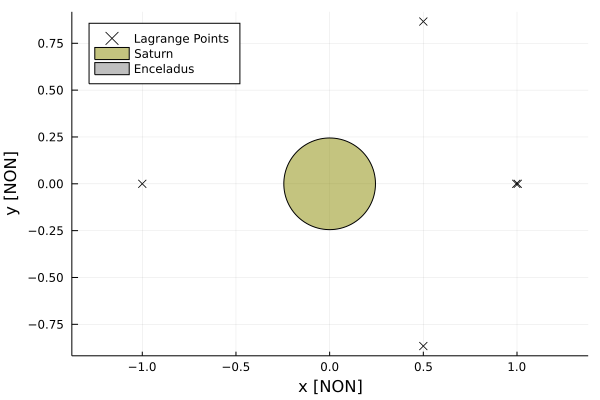

In [15]:
plot(saturn_enceladus())

### You can set the 'scaled' argument to 'true' to make the bodies easier to see, but note that they are not their true size

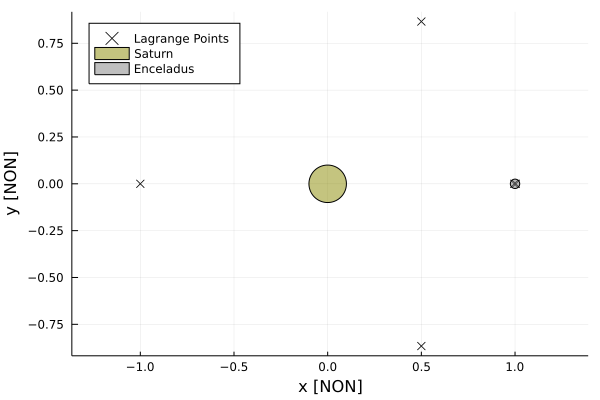

In [16]:
plot(saturn_enceladus(),scaled=true)